# Task1

In [11]:
import numpy as np

np.seterr(divide='ignore', invalid='ignore')

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import seaborn as sns

sns.set()

from analysis.preprocessing import read_test_data
from analysis.plotting import plot_spectra

# Load data from files

In [3]:
X_df = pd.read_csv('data/X_train.csv')
y_df = pd.read_csv('data/y_train.csv')
X_test_df = pd.read_csv('data/X_test.csv', sep=';')

In [4]:
spectra = X_df['spectra'].values
spectra_test = X_test_df['spectra'].values

spectra = np.array([np.array(dd[1:-1].split(',')).astype(float) for dd in spectra])
spectra_test = np.array([np.array(dd[1:-1].split(',')).astype(float) for dd in spectra_test])

In [5]:
X_df['spectra'] = spectra.tolist()
X_test_df['spectra'] = spectra_test.tolist()

In [6]:
freqs = pd.read_csv('data/freq.csv')
freqs = freqs['freqs'].values

# print(len(freqs), freqs)
print(np.unique(y_df['molecule'].values))

['A' 'B' 'Q' 'R']


In [7]:
# Target for classification
molecules_map = {'A': 0, 'B': 1, 'Q': 2, 'R': 3}
y_df['molecule'] = y_df['molecule'].replace(molecules_map)
molecule = y_df['molecule'].values

In [8]:
# Target for regression
concentration = y_df['concentration'].values

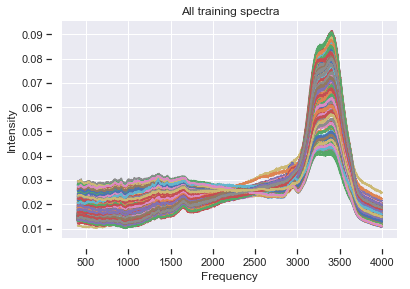

In [12]:
fig, ax = plot_spectra(freqs, spectra, 'All training spectra')

Start train the data and then test it

In [14]:
from sklearn.model_selection import train_test_split

X_test1 = read_test_data('data/X_test.csv')
# Calculate test size
test_size = ((len(X_test1)) / (len(spectra)))
print('Test size:', test_size)
train_features, test_features, train_labels, test_labels = train_test_split(spectra, molecule, test_size=test_size,
                                                                            random_state=42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('X_test1 Shape:', X_test1.shape)

Test size: 0.4291845493562232
Training Features Shape: (399, 1866)
Training Labels Shape: (399,)
Testing Features Shape: (300, 1866)
Testing Labels Shape: (300,)
X_test1 Shape: (300, 1866)


In [15]:
# Make predictions on test data using the model trained on original data
rf = RandomForestClassifier()
rf.fit(train_features[:len(X_test1) - 1], train_labels[:len(X_test1) - 1])
pred_molecule = rf.predict(X_test1)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
molecules_map = {0: 'A', 1: 'B', 2: 'Q', 3: 'R'}
pred_molecule_data = map(lambda x: molecules_map[x], pred_molecule)
X_test_df['molecule'] = pred_molecule_data

In [17]:
print('Predictions Shape:', pred_molecule.shape)
# Performance metrics
errors = abs(np.subtract(pred_molecule, test_labels))
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate and display accuracy
print('Accuracy:', round(rf.score(test_features, test_labels), 3), '%.')
accuracy_molecule = round(rf.score(test_features, test_labels), 3)

Predictions Shape: (300,)
Metrics for Random Forest Trained on Original Data
Average absolute error: 1.23 degrees.
Accuracy: 0.837 %.


# Start predict concentration


In [18]:
train_features, test_features, train_labels, test_labels = train_test_split(spectra, concentration, test_size=test_size,
                                                                            random_state=42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('X_test1 Shape:', X_test1.shape)

Training Features Shape: (399, 1866)
Training Labels Shape: (399,)
Testing Features Shape: (300, 1866)
Testing Labels Shape: (300,)
X_test1 Shape: (300, 1866)


In [19]:
# Make predictions on test data using the model trained on original data
rfr = RandomForestRegressor()
rfr.fit(train_features[:len(X_test1) - 1], train_labels[:len(X_test1) - 1])
pred_concentration = rfr.predict(X_test1)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
X_test_df['concentration'] = pred_concentration.tolist()
X_test_df.to_csv('sample.csv', index=False)

In [21]:
print('Predictions Shape:', pred_concentration.shape)
# Performance metrics
errors = abs(np.subtract(pred_concentration, test_labels))
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate and display accuracy
print('Accuracy:', round(rfr.score(test_features, test_labels), 3), '%.')
accuracy_concentration = round(rfr.score(test_features, test_labels), 3)

Predictions Shape: (300,)
Metrics for Random Forest Trained on Original Data
Average absolute error: 4502.17 degrees.
Accuracy: 0.954 %.


# End predict concentration

# Calculate score

In [22]:
score = ((2 / 3) * accuracy_molecule) + ((1 / 3) * accuracy_concentration)
print('Score:', score)

Score: 0.8759999999999999
